In [37]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from scipy import stats

# Load your dataset
data = pd.read_csv('data.csv')
print("Initial Dataset Shape:", data.shape)
print("First 5 Rows of the Dataset:\n", data.head())

# Step 1: Data Cleaning
print("\n=== Step 1: Data Cleaning ===")

## 1.1 Handle Missing Values using KNN Imputation
print("Handling missing values with KNN Imputer...")
numeric_data = data.select_dtypes(include=['float64', 'int64'])
imputer = KNNImputer(n_neighbors=5)
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)
print("Missing values handled. Sample of Imputed Data:\n", numeric_data_imputed.head())

# Update data with imputed values
data[numeric_data.columns] = numeric_data_imputed

## 1.2 Outlier Detection using Isolation Forest
print("Detecting and removing outliers using Isolation Forest...")
iso_forest = IsolationForest(contamination=0.02, random_state=42)
iso_outliers = iso_forest.fit_predict(numeric_data_imputed) == -1
data_cleaned = data.loc[~iso_outliers].reset_index(drop=True)
print(f"Dataset shape after outlier removal: {data_cleaned.shape}")

# Step 2: Feature Engineering
print("\n=== Step 2: Feature Engineering ===")

## 2.1 Handwriting Dynamics Features
print("Creating derived features for handwriting dynamics...")

# Calculate pressure variability
pressure_cols = [col for col in data_cleaned.columns if 'pressure_mean' in col]
data_cleaned['pressure_variability'] = data_cleaned[pressure_cols].std(axis=1)
print("Pressure variability feature added.")

# Calculate task completion ratio
time_cols = [col for col in data_cleaned.columns if 'total_time' in col]
data_cleaned['task_completion_ratio'] = data_cleaned[time_cols].mean(axis=1) / data_cleaned[time_cols].sum(axis=1)
print("Task completion ratio feature added.")
print("Sample of Data with New Features:\n", data_cleaned[['pressure_variability', 'task_completion_ratio']].head())

# Step 3: Data Transformation
print("\n=== Step 3: Data Transformation ===")

## 3.1 Scaling Numerical Features
print("Scaling numerical features...")
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_cleaned.select_dtypes(include=['float64', 'int64']))
scaled_data = pd.DataFrame(scaled_features, columns=data_cleaned.select_dtypes(include=['float64', 'int64']).columns)
print("Numerical features scaled. Sample of Scaled Data:\n", scaled_data.head())

## 3.2 Encoding Categorical Features
print("Encoding categorical features...")
if 'class' in data_cleaned.columns:
    le = LabelEncoder()
    data_cleaned['class_encoded'] = le.fit_transform(data_cleaned['class'])
    print("Class feature encoded. Sample Encoded Classes:\n", data_cleaned[['class', 'class_encoded']].head())

# Step 4: Dimensionality Reduction and Feature Selection
print("\n=== Step 4: Dimensionality Reduction and Feature Selection ===")

## 4.1 Dimensionality Reduction with PCA
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=0.95)  # Preserve 95% variance
pca_data = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
print("PCA applied. Reduced data sample:\n", pca_df.head())
print("Shape after PCA:", pca_df.shape)

## 4.2 Feature Selection with Lasso
print("Applying Lasso for feature selection...")
lasso = Lasso(alpha=0.01)
lasso.fit(scaled_features, data_cleaned['class_encoded'])
lasso_selected_features = SelectFromModel(lasso, prefit=True).get_support(indices=True)
selected_features = scaled_data.columns[lasso_selected_features]
print("Selected Features based on Lasso:\n", selected_features)

# Combine PCA results and target variable into a final dataset
final_data = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
final_data['class'] = data_cleaned['class_encoded'].values

# Display final dataset
print("\n=== Final Dataset ===")
print("Shape of Final Dataset:", final_data.shape)
print("Sample of Final Data:\n", final_data.head())

Initial Dataset Shape: (174, 452)
First 5 Rows of the Dataset:
      ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
0  id_1       5160     0.000013    120.804174       86.853334   
1  id_2      51980     0.000016    115.318238       83.448681   
2  id_3       2600     0.000010    229.933997      172.761858   
3  id_4       2130     0.000010    369.403342      183.193104   
4  id_5       2310     0.000007    257.997131      111.275889   

   max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
0               957              6601          0.361800            0.217459   
1              1694              6998          0.272513            0.144880   
2              2333              5802          0.387020            0.181342   
3              1756              8159          0.556879            0.164502   
4               987              4732          0.266077            0.145104   

   mean_gmrt1  ...  mean_jerk_in_air25  mean_jerk_on_paper25  \
0  103

=== Step 1: Initial Data Overview ===
Initial data shape: (174, 452)
Columns: ['ID', 'air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1', 'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1', 'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1', 'mean_jerk_on_paper1', 'mean_speed_in_air1', 'mean_speed_on_paper1', 'num_of_pendown1', 'paper_time1', 'pressure_mean1', 'pressure_var1', 'total_time1', 'air_time2', 'disp_index2', 'gmrt_in_air2', 'gmrt_on_paper2', 'max_x_extension2', 'max_y_extension2', 'mean_acc_in_air2', 'mean_acc_on_paper2', 'mean_gmrt2', 'mean_jerk_in_air2', 'mean_jerk_on_paper2', 'mean_speed_in_air2', 'mean_speed_on_paper2', 'num_of_pendown2', 'paper_time2', 'pressure_mean2', 'pressure_var2', 'total_time2', 'air_time3', 'disp_index3', 'gmrt_in_air3', 'gmrt_on_paper3', 'max_x_extension3', 'max_y_extension3', 'mean_acc_in_air3', 'mean_acc_on_paper3', 'mean_gmrt3', 'mean_jerk_in_air3', 'mean_jerk_on_paper3', 'mean_speed_in_air3', 'mean_speed_on_paper3', 'nu

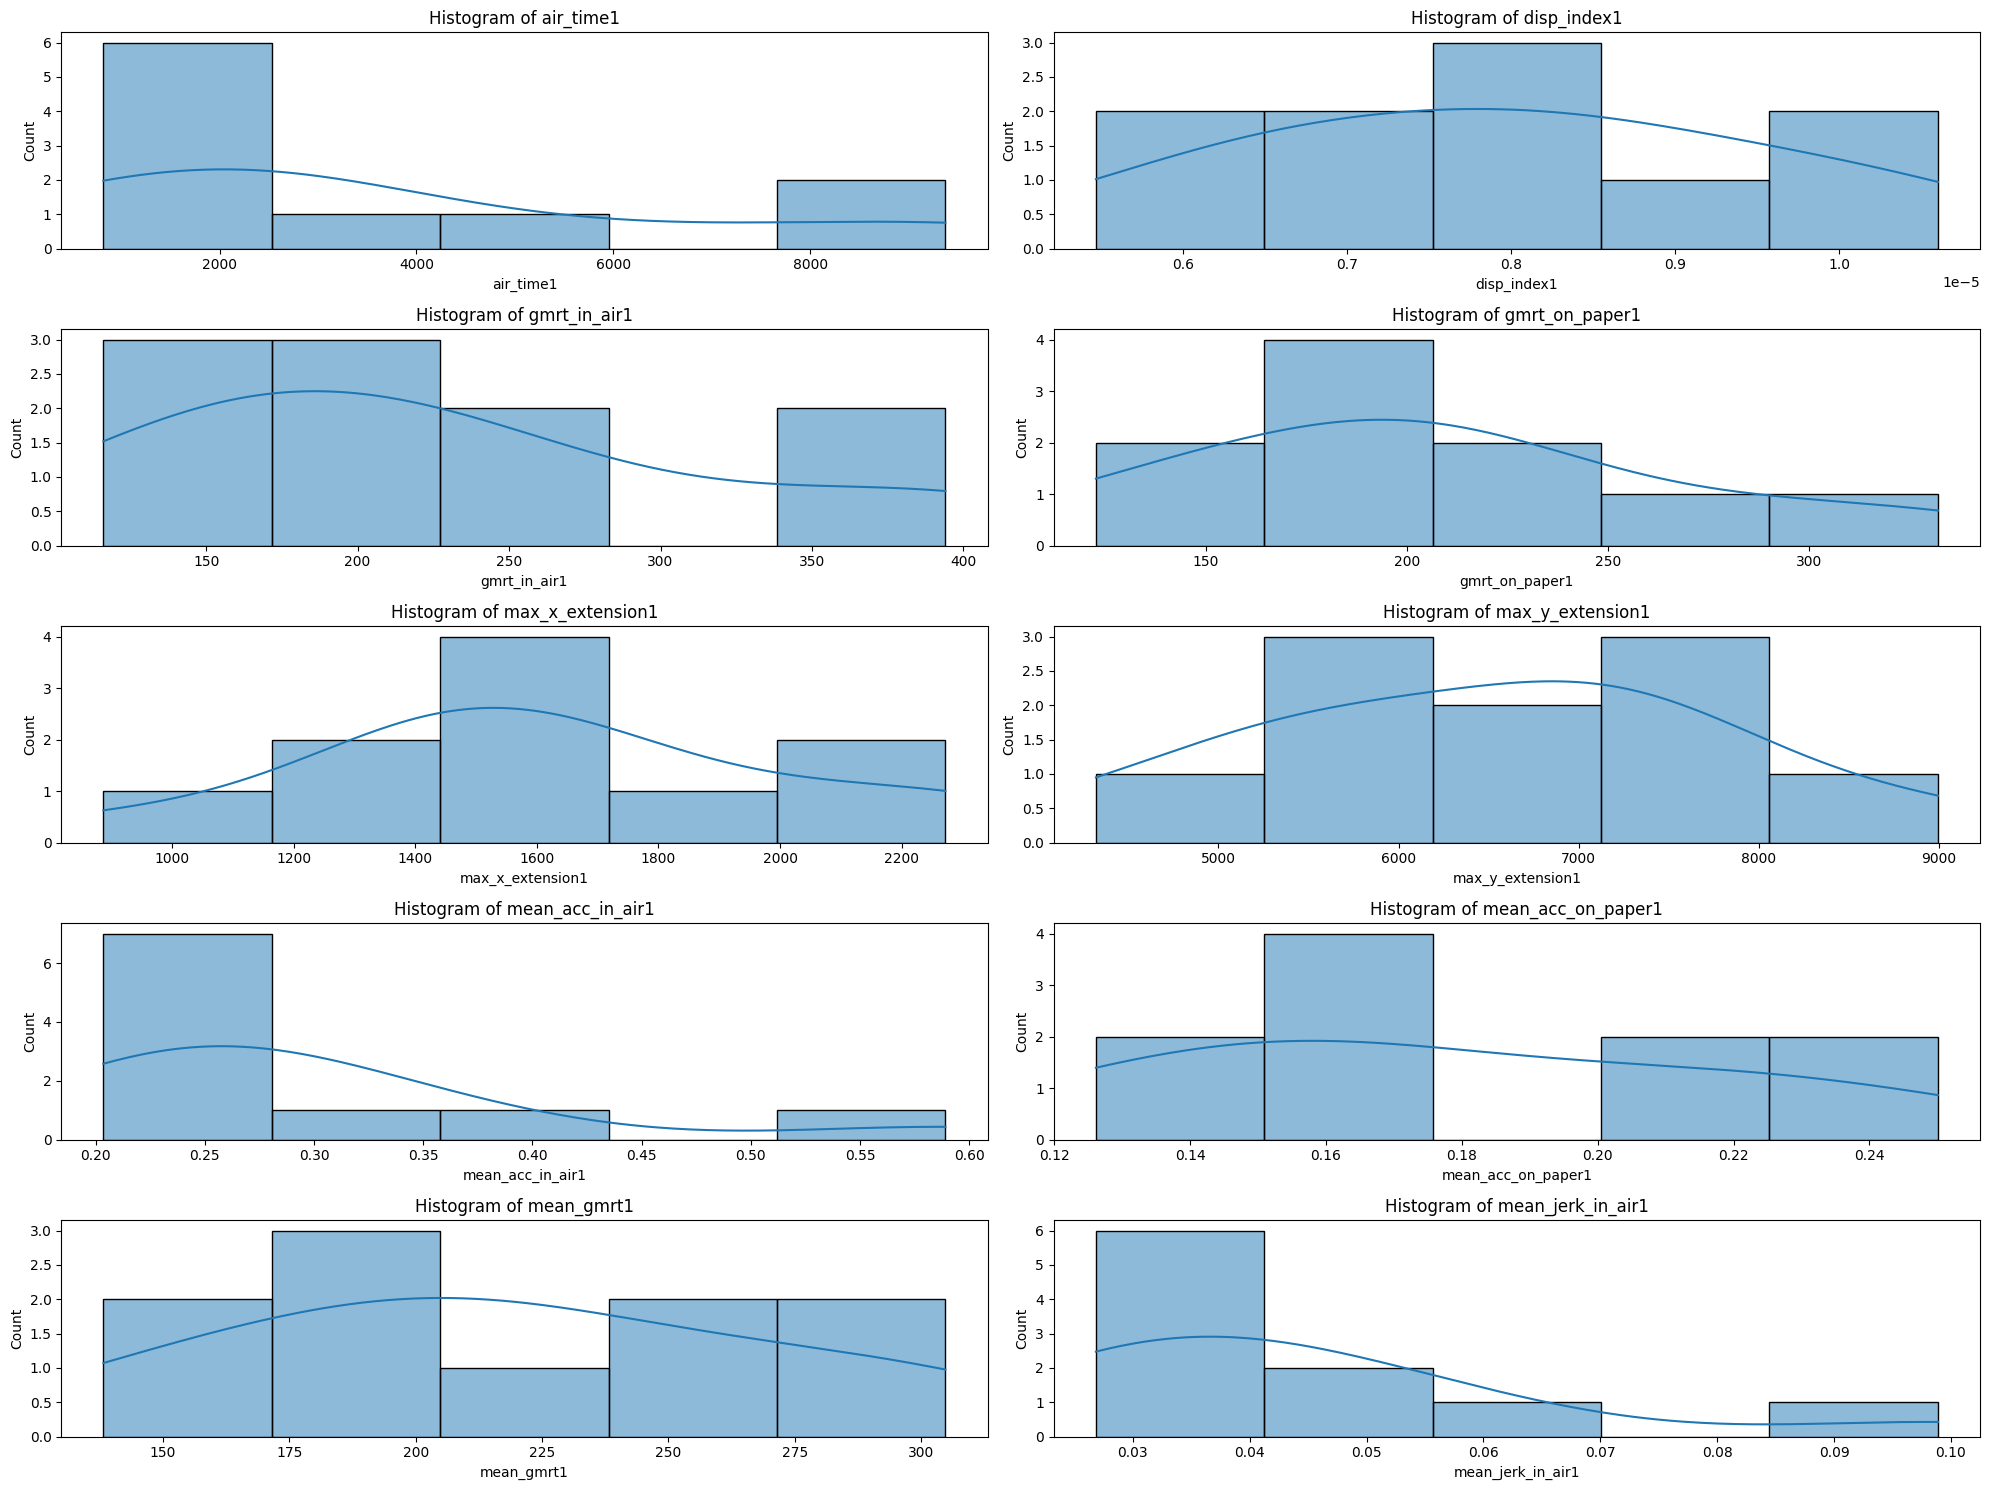


Cleaned data saved to cleaned_data.csv
Final data shape: (20, 460)


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Initial data overview
print("=== Step 1: Initial Data Overview ===")
print("Initial data shape:", data.shape)
print("Columns:", data.columns.tolist())
print("\nData types:\n", data.dtypes.value_counts())
print("\nMissing values per column:\n", data.isnull().sum().sort_values(ascending=False).head())

# Function to handle missing values
def handle_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0])
        else:
            df[column].fillna(df[column].median())
    print("Missing values handled without removing any rows.")
    return df

# Function to remove outliers for each numeric column individually
def remove_outliers(df, threshold=3):
    df_no_outliers = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        col_zscore = zscore(df_no_outliers[col])
        df_no_outliers = df_no_outliers[(np.abs(col_zscore) < threshold)]
    print(f"Outliers removed: {len(df) - len(df_no_outliers)} rows")
    return df_no_outliers

# Function to perform one-hot encoding on categorical variables
def encode_categorical(df):
    df_encoded = pd.get_dummies(df, drop_first=True)
    print(f"One-hot encoding complete. Encoded data shape: {df_encoded.shape}")
    return df_encoded

# Function to plot histograms for numeric columns
def plot_histograms(df, cols=10):
    numeric_cols = df.select_dtypes(include=[np.number]).columns[:cols]  # Limiting to first `cols` numeric columns
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(5, 2, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

# Apply preprocessing steps
print("\n=== Step 2: Basic Preprocessing ===")

# Step 1: Handle Missing Values
data = handle_missing_values(data)

# Step 2: Remove Outliers
data = remove_outliers(data)

# Step 3: Separate target variable before encoding
if 'class' in data.columns:
    y = data['class']
    X = data.drop(['class'], axis=1)  # Features only, excluding the target column
else:
    y = data.iloc[:, -1]  # Assuming last column is the target if 'class' is missing
    X = data.iloc[:, :-1]

# Step 4: One-Hot Encoding for Categorical Variables (only on features)
X_encoded = encode_categorical(X)

# Combine encoded features and target variable
data_encoded = pd.concat([X_encoded, y.reset_index(drop=True)], axis=1)
print("Encoded data shape:", data_encoded.shape)

# Step 5: Plot Histograms for Numeric Variables
print("\n=== Step 3: Data Visualization ===")
plot_histograms(data, cols=10)  # Plots the first 10 numeric columns for visualization

# Save cleaned data to a new CSV file
output_path = 'cleaned_data.csv'
data_encoded.to_csv(output_path, index=False)
print(f"\nCleaned data saved to {output_path}")
print("Final data shape:", data_encoded.shape)


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import scipy.stats as stats
import statsmodels.api as sm
dataset = pd.read_csv('data.csv')
dataset.head()
# STEP3: EXPLORATORY DATA ANALYSIS
dataset.info()
dataset.describe()
dataset.shape #size
dataset.duplicated() # not all boolean values visible
dataset.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


0

In [40]:
dataset.isnull().sum()

,0
ID,0
air_time1,0
disp_index1,0
gmrt_in_air1,0
gmrt_on_paper1,0
...,...
paper_time25,0
pressure_mean25,0
pressure_var25,0
total_time25,0


In [41]:
dummies=pd.get_dummies(dataset)
dummies
dummies.columns # returns the names of all the columns as a list
print(dummies.shape)
print(dummies.columns)
# Print the shape and columns to see what’s available
print(dummies.shape)
print(dummies.columns)

# Adjust column selection based on available indices
X = dummies.iloc[:, [0, 1, 2, 3, 4]]  # Make sure these indices are within bounds
y = dummies.iloc[:, 3]  # Verify if index 3 is valid

(174, 626)
Index(['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1',
       ...
       'ID_id_92', 'ID_id_93', 'ID_id_94', 'ID_id_95', 'ID_id_96', 'ID_id_97',
       'ID_id_98', 'ID_id_99', 'class_H', 'class_P'],
      dtype='object', length=626)
(174, 626)
Index(['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1',
       ...
       'ID_id_92', 'ID_id_93', 'ID_id_94', 'ID_id_95', 'ID_id_96', 'ID_id_97',
       'ID_id_98', 'ID_id_99', 'class_H', 'class_P'],
      dtype='object', length=626)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
X_train.describe()
X_test.describe()
y_train.describe()
y_test.describe()

,gmrt_on_paper1
count,53.000000
mean,190.635229
std,76.615250
min,86.784455
25%,138.510957
50%,172.761858
75%,231.279337
max,489.955717


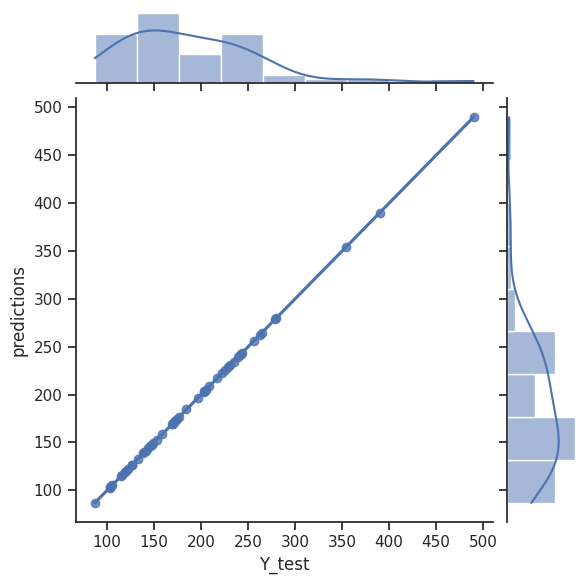

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # object regressor is created
regressor.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10)
accuracies
regressor.coef_ # slope
regressor.intercept_

# STEP10: PREDICTING ON TEST DATA
y_pred = regressor.predict(X_test)
y_pred
linearity_test_df = pd.DataFrame(X_test)
endogenity_check = linearity_test_df.corr()
endogenity_check
residual_test = np.column_stack([y_test,y_pred])
residual_test = pd.DataFrame(residual_test)
residual_test.columns='Y_test predictions'.split()
sns.jointplot(x='Y_test', y='predictions', data=residual_test, kind='reg')

In [44]:
stats.levene(residual_test['Y_test'], residual_test['predictions'])

# STEP12: MODEL EVALUATION: MSE, R2
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)
regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         gmrt_on_paper1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.270e+30
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                        0.00
Time:                        06:04:01   Log-Likelihood:                          4694.7
No. Observations:                 174   AIC:                                     -9379.
Df Residuals:                     169   BIC:                                     -9364.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
air_time1         2.853e-18   3.15e-18      0.905      0.367   -3.37e-18    9.08e-18
disp_index1       2.197e-09   6.67e-09      0.330      0.742    -1.1e-08    1.54e-08
gmrt_in_air1      1.254e-15   2.39e-16      5.236      0.000    7.81e-16    1.73e-15
gmrt_on_paper1       1.0000   3.81e-16   2.62e+15      0.000       1.000       1.000
max_x_extension1 -2.013e-16   2.38e-17     -8.473      0.000   -2.48e-16   -1.54e-16
==============================================================================
Omnibus:                      189.913   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8127.677
Skew:                           3.985   Prob(JB):                         0.00
Kurtosis:                      35.520   Cond. No.                     2.59e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.59e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coefficient: -0.008501229793601194
Intercept: 1.2585167227198883
Mean Squared Error: 0.03803332634133738
R-squared: 0.8446972507728724


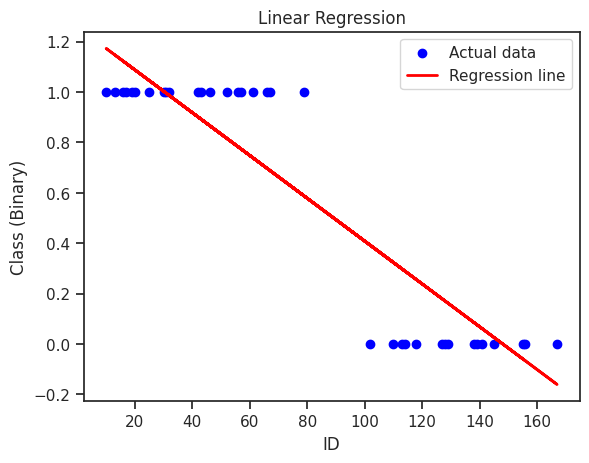

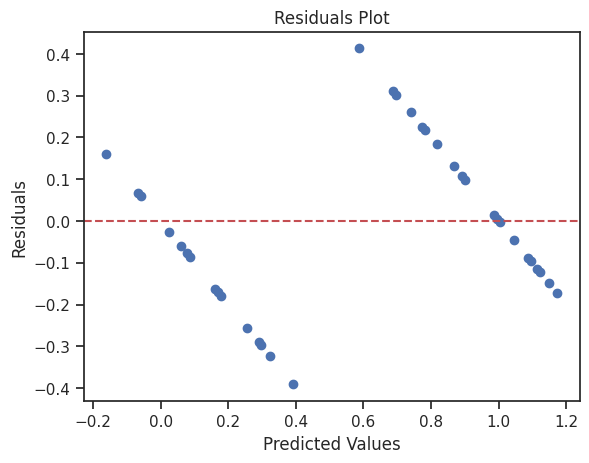

Cross-Validation MSE: 0.10105721073237858
Ridge Coefficients: [-0.00850121]
Lasso Coefficients: [-0.00846134]
Polynomial Regression Coefficients: [[ 0.00000000e+00 -7.72305956e-03 -4.40064968e-06]]
Intercept: [1.23515557]
Mean Squared Error: 0.03770221144795708
R-squared: 0.8460493032541753


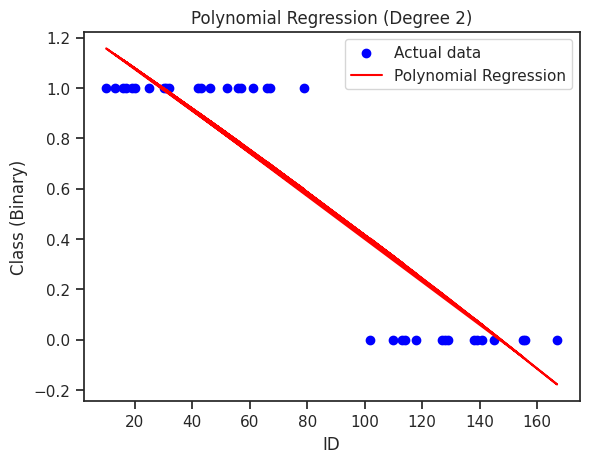

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
df = pd.read_csv('data.csv')

# Extract numeric part from ID and prepare data
df['ID'] = df['ID'].str.extract('(\d+)').astype(int)
X = df[['ID']]  # Feature
Y = pd.get_dummies(df['class'], drop_first=True)  # Convert 'class' to binary

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Coefficients and evaluation
print('Coefficient:', model.coef_[0][0])
print('Intercept:', model.intercept_[0])
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
print('R-squared:', r2_score(Y_test, Y_pred))

# Plot the regression line
plt.scatter(X_test, Y_test, color='blue', label='Actual data')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('ID')
plt.ylabel('Class (Binary)')
plt.legend()
plt.title('Linear Regression')
plt.show()

# Residuals
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Cross-validation
cv_scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')
print('Cross-Validation MSE:', -cv_scores.mean())

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)
print('Ridge Coefficients:', ridge_model.coef_[0])

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train)
print('Lasso Coefficients:', lasso_model.coef_)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
Y_poly_pred = poly_model.predict(X_test_poly)

# Polynomial Regression evaluation
print('Polynomial Regression Coefficients:', poly_model.coef_)
print('Intercept:', poly_model.intercept_)
print('Mean Squared Error:', mean_squared_error(Y_test, Y_poly_pred))
print('R-squared:', r2_score(Y_test, Y_poly_pred))

# Plot Polynomial Regression
plt.scatter(X_test, Y_test, color='blue', label='Actual data')
plt.plot(X_test, Y_poly_pred, color='red', label='Polynomial Regression')
plt.xlabel('ID')
plt.ylabel('Class (Binary)')
plt.legend()
plt.title('Polynomial Regression (Degree 2)')
plt.show()


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('data.csv')

# Identify target column and feature columns
target_column = 'class'  # Replace with the actual target column name
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Encode categorical columns if any
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model with increased max_iter
log_reg = LogisticRegression(max_iter=200)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8857142857142857
Classification Report:
               precision    recall  f1-score   support

           H       0.82      0.93      0.88        15
           P       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35

Confusion Matrix:
 [[14  1]
 [ 3 17]]


The optimal number of neighbors is 7


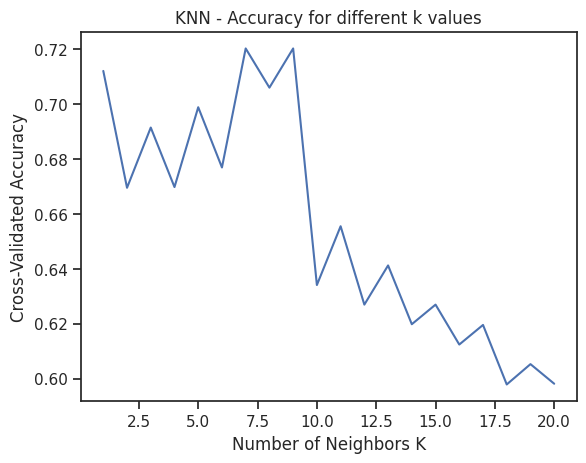

Accuracy: 0.6571428571428571
Classification Report:
               precision    recall  f1-score   support

           H       0.56      0.93      0.70        15
           P       0.90      0.45      0.60        20

    accuracy                           0.66        35
   macro avg       0.73      0.69      0.65        35
weighted avg       0.75      0.66      0.64        35

Confusion Matrix:
 [[14  1]
 [11  9]]


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')

# Identify target column and feature columns
target_column = 'class'  # Replace with the actual target column name
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Encode categorical columns if any
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for k in KNN
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Determine the best k
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k}")

# Plotting the accuracy for different k-values
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN - Accuracy for different k values')
plt.show()

# Train final model with the optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Drop the 'ID' column and separate features and target label
X = data.drop(columns=['ID', 'class'])
y = data['class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN model with k=3 (can be tuned further)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
# Predict the class labels for the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6857142857142857
Classification Report:
               precision    recall  f1-score   support

           H       0.58      0.93      0.72        15
           P       0.91      0.50      0.65        20

    accuracy                           0.69        35
   macro avg       0.75      0.72      0.68        35
weighted avg       0.77      0.69      0.68        35



In [49]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Drop the 'ID' column and separate features and target label
X = data.drop(columns=['ID', 'class'])
y = data['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Predict class labels for the entire dataset
y_pred_all = knn.predict(X_scaled)

# Add predictions to the original data
data['Predicted_Class'] = y_pred_all
# Display the first few rows of the data with the predictions
print(data[['ID', 'class', 'Predicted_Class']].head())

# Save the results to a CSV file if needed
data.to_csv('data_with_predictions.csv', index=False)

     ID class Predicted_Class
0  id_1     P               H
1  id_2     P               P
2  id_3     P               P
3  id_4     P               P
4  id_5     P               H


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Drop the 'ID' column and separate features and target label
X = data.drop(columns=['ID', 'class'])
y = data['class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
# Predict class labels for the test set
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8285714285714286
Classification Report:
               precision    recall  f1-score   support

           H       0.80      0.80      0.80        15
           P       0.85      0.85      0.85        20

    accuracy                           0.83        35
   macro avg       0.82      0.82      0.82        35
weighted avg       0.83      0.83      0.83        35



In [51]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Drop the 'ID' column and separate features and target label
X = data.drop(columns=['ID', 'class'])
y = data['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_scaled, y)

# Predict class labels for the entire dataset
y_pred_all = nb.predict(X_scaled)

# Add predictions to the original data
data['Predicted_Class'] = y_pred_all
# Display the first few rows of the data with the predictions
print(data[['ID', 'class', 'Predicted_Class']].head())

# Save the results to a CSV file if needed
data.to_csv('data_with_naive_bayes_predictions.csv', index=False)

     ID class Predicted_Class
0  id_1     P               P
1  id_2     P               P
2  id_3     P               P
3  id_4     P               P
4  id_5     P               P


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Drop the 'ID' column and separate features and target label
X = data.drop(columns=['ID', 'class'])
y = data['class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model with a linear kernel
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
# Predict class labels for the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           H       0.81      0.87      0.84        15
           P       0.89      0.85      0.87        20

    accuracy                           0.86        35
   macro avg       0.85      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35



In [53]:
# Predict class labels for the entire dataset
X_scaled = scaler.fit_transform(X)
y_pred_all = svm.predict(X_scaled)

# Add predictions to the original data
data['Predicted_Class'] = y_pred_all

# Display the first few rows of the data with predictions
print(data[['ID', 'class', 'Predicted_Class']].head())

# Save the results to a CSV file if needed
data.to_csv('data_with_svm_predictions.csv', index=False)

     ID class Predicted_Class
0  id_1     P               P
1  id_2     P               P
2  id_3     P               P
3  id_4     P               P
4  id_5     P               P


In [54]:
import pandas as pd
import numpy as np

# Generate random values for testing
# Number of features should match the columns in X (without 'ID' and 'class')
num_features = X.shape[1]
random_data = np.random.rand(5, num_features)  # Generate 5 random samples

# Convert random data to a DataFrame with the same feature names as X
random_data_df = pd.DataFrame(random_data, columns=X.columns)

# Standardize the random data using the same scaler used for training
random_data_scaled = scaler.transform(random_data_df)

# Predict class labels for the random data
random_predictions = svm.predict(random_data_scaled)

# Display the random data and corresponding predictions
for i, (sample, pred) in enumerate(zip(random_data, random_predictions), start=1):
    print(f"Sample {i}: {sample}\nPredicted Class: {pred}\n")


Sample 1: [2.35003290e-01 9.60159938e-01 1.58926240e-02 5.36305499e-01
 6.71018606e-01 4.40732091e-01 4.75707987e-01 9.39762803e-01
 1.08157736e-01 5.28470068e-01 8.63843418e-01 7.99253788e-01
 7.31010844e-01 3.78681513e-01 5.60914523e-01 5.85597748e-01
 2.99337367e-01 3.15562581e-01 5.34339014e-01 2.28256380e-01
 9.10883750e-01 1.87601323e-01 6.39590336e-01 9.37559839e-01
 7.62035448e-01 8.65019672e-01 4.96047512e-01 2.14642528e-01
 3.38478610e-01 5.07511836e-01 2.11635922e-01 1.23973829e-01
 8.89187128e-01 1.16618492e-01 3.18526764e-01 1.45645320e-01
 1.19269137e-01 4.84955896e-01 5.56659774e-01 8.63816145e-01
 3.71922205e-01 1.63103417e-01 7.14479802e-01 8.56042022e-01
 5.74736216e-01 3.51247558e-01 6.01249114e-01 3.44091696e-01
 7.91375840e-01 7.74325748e-01 1.13555854e-01 9.41975178e-01
 4.60720303e-01 7.59960908e-01 9.56469597e-01 7.73646075e-01
 7.87318789e-01 3.66799203e-01 9.92286139e-01 3.78341899e-01
 3.45976039e-01 9.88072385e-01 5.55511487e-01 3.21778852e-01
 3.51258034e-0

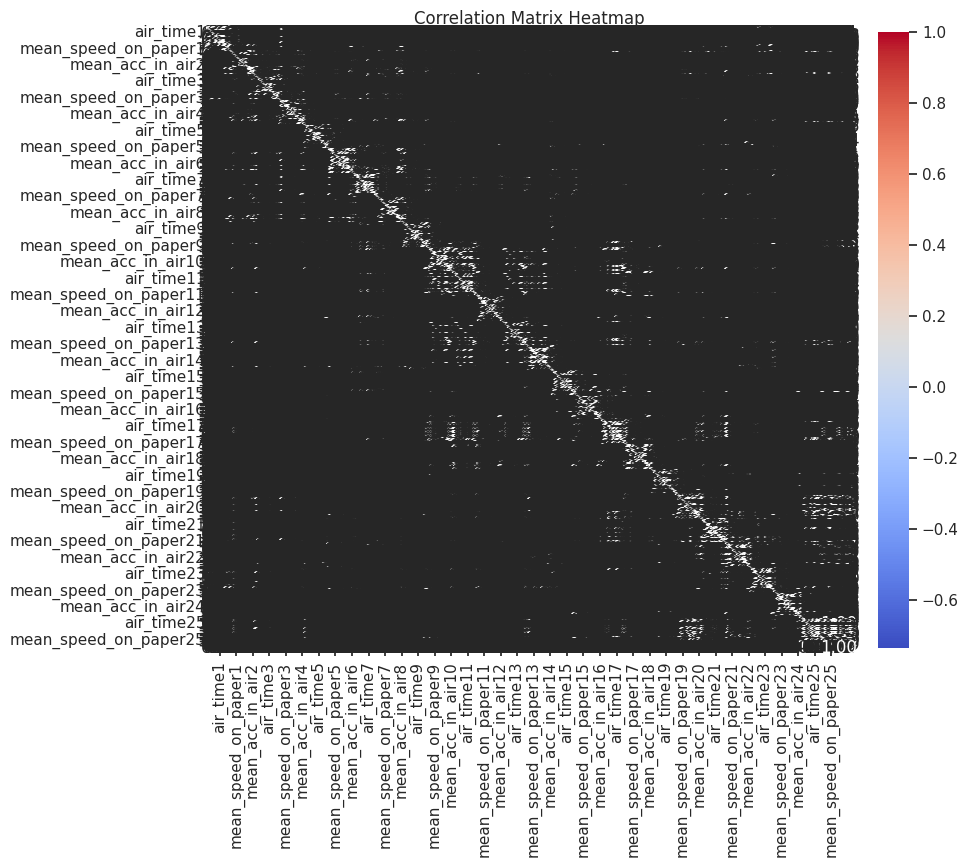

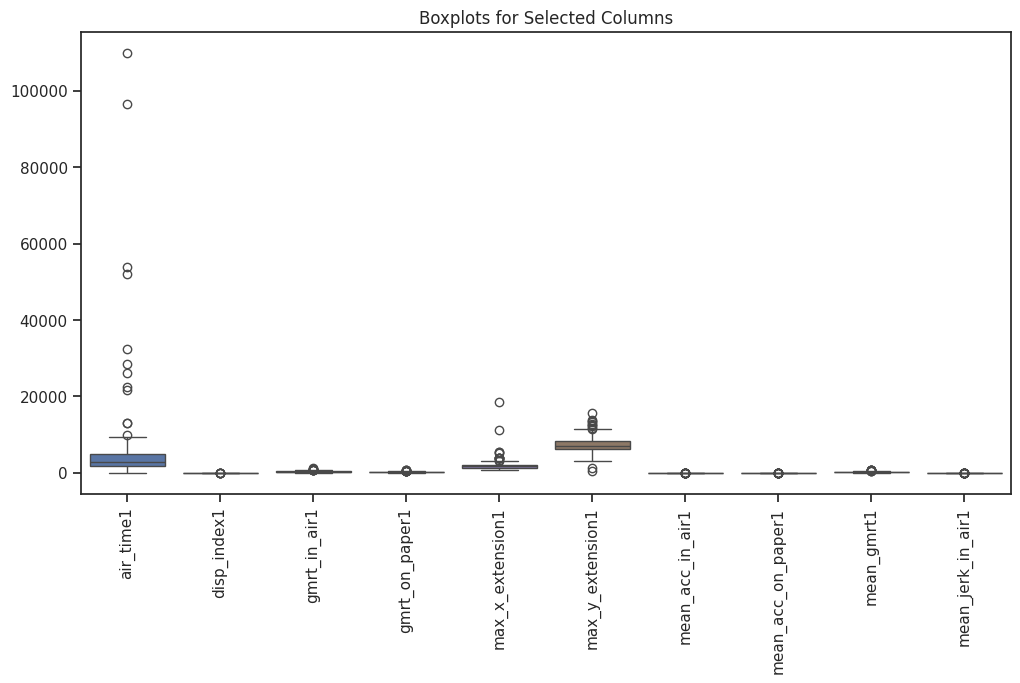

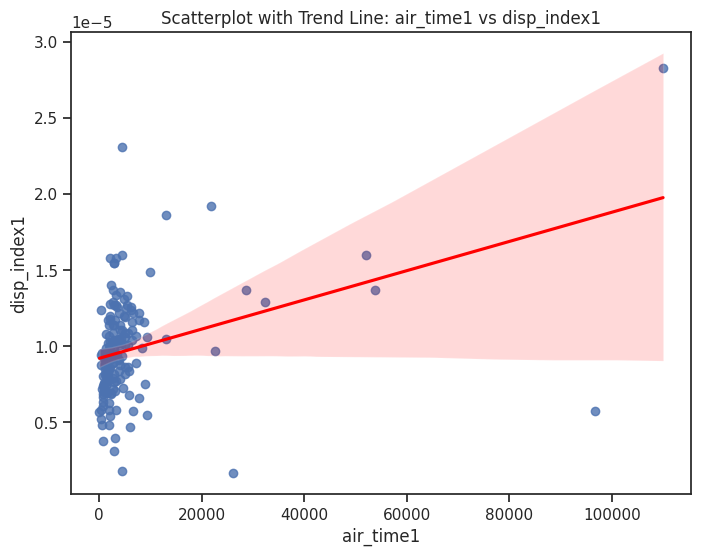

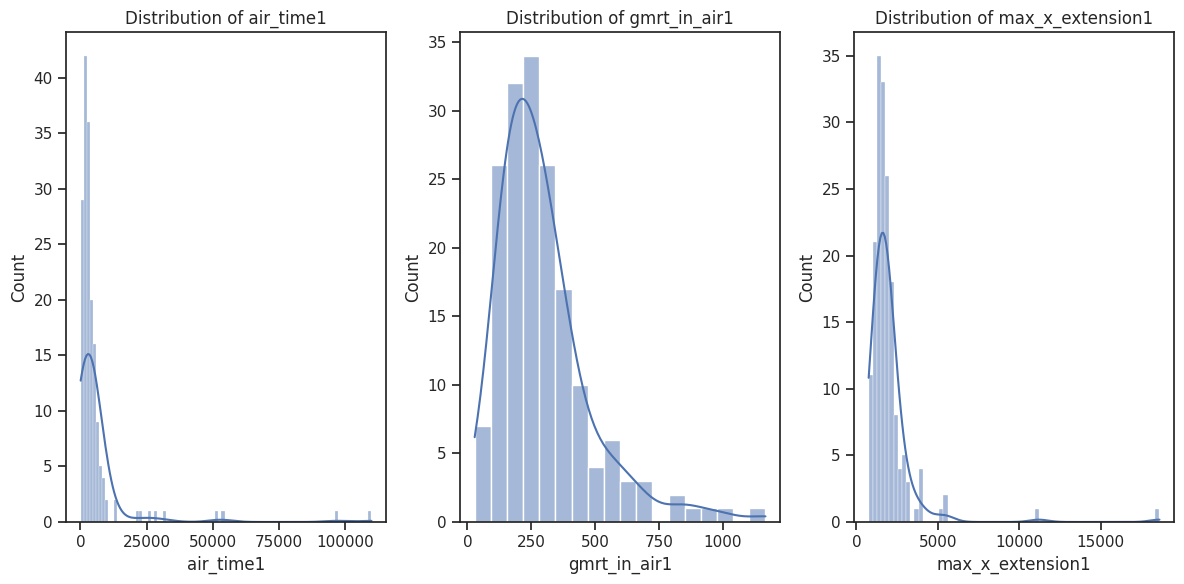

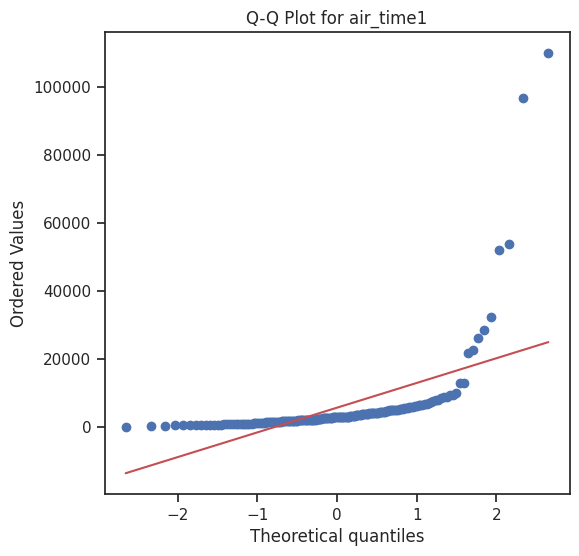

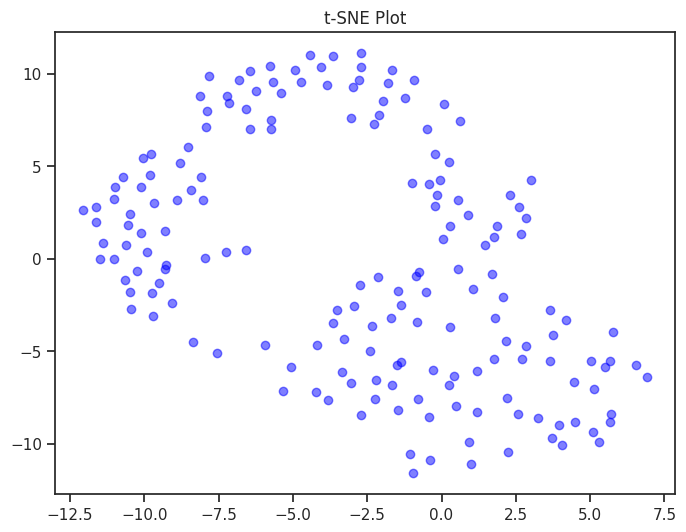

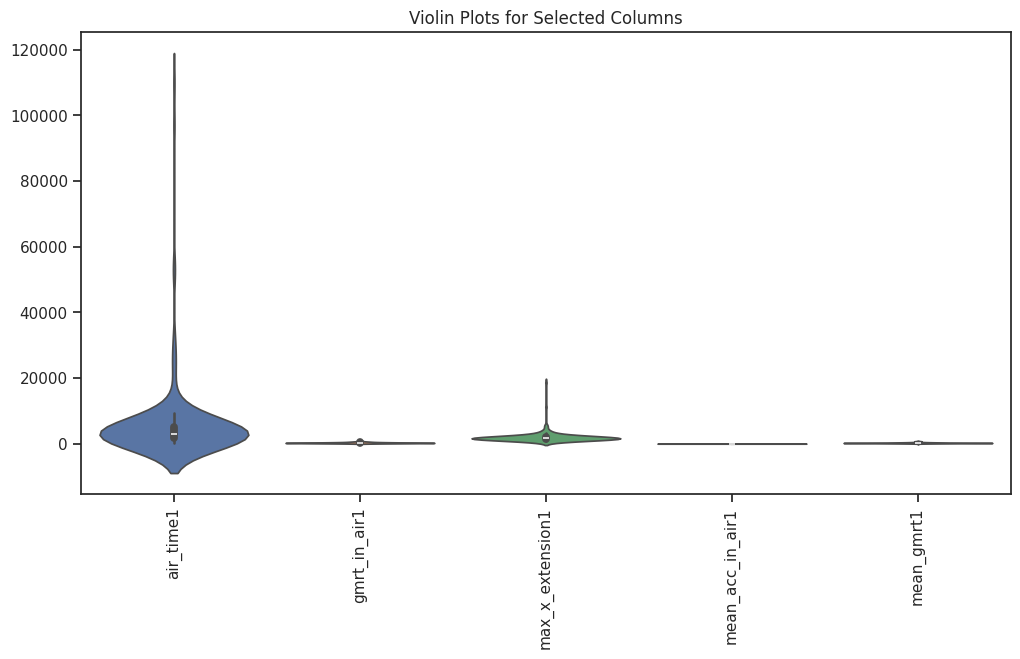

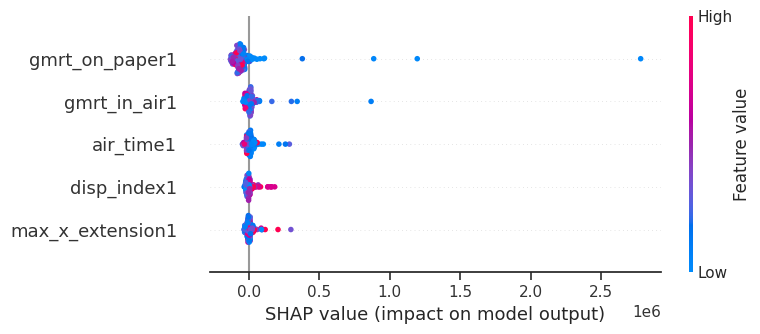

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import scipy.stats as stats
import shap
from sklearn.ensemble import RandomForestRegressor

# Load your data
file_path = 'data.csv'  # Use the actual file path if different
data = pd.read_csv(file_path)

# Select only numeric columns for plots
numeric_data = data.select_dtypes(include=['float64', 'int64'])

### 1. Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### 2. Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_data.iloc[:, :10])  # Adjust slice for the first 10 numeric columns
plt.title("Boxplots for Selected Columns")
plt.xticks(rotation=90)
plt.show()

### 3. Scatterplots with Trend Lines
plt.figure(figsize=(8, 6))
sns.regplot(x='air_time1', y='disp_index1', data=numeric_data, line_kws={"color": "red"})
plt.title("Scatterplot with Trend Line: air_time1 vs disp_index1")
plt.show()

### 4. Distribution Plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(['air_time1', 'gmrt_in_air1', 'max_x_extension1'], 1):  # Selected columns for distribution
    plt.subplot(1, 3, i)
    sns.histplot(numeric_data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### 5. Q-Q Plots
plt.figure(figsize=(6, 6))
stats.probplot(numeric_data['air_time1'], dist="norm", plot=plt)
plt.title("Q-Q Plot for air_time1")
plt.show()

### 6. t-SNE
# Perform t-SNE on the first 50 numeric columns
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(numeric_data.iloc[:, :50])

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.5)
plt.title("t-SNE Plot")
plt.show()

### 7. Violin Plots
plt.figure(figsize=(12, 6))
sns.violinplot(data=numeric_data[['air_time1', 'gmrt_in_air1', 'max_x_extension1', 'mean_acc_in_air1', 'mean_gmrt1']])
plt.title("Violin Plots for Selected Columns")
plt.xticks(rotation=90)
plt.show()

### 8. SHAP Values
# For SHAP, fit a model (RandomForest as an example)
X = numeric_data[['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1', 'max_x_extension1']]
y = data['total_time25']  # Replace with the appropriate target column

model = RandomForestRegressor()
model.fit(X, y)

# SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('data.csv')

# Preprocessing
X = data.drop(columns=['ID', 'class'])  # Features
y = data['class']  # Target variable

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Encode 'H' and 'P' to 0 and 1, respectively

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Gradient Boosting (XGBoost) - Updated
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)  # Removed use_label_encoder
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))



Random Forest Accuracy: 0.8857142857142857
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35

XGBoost Accuracy: 0.9142857142857143
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.95      0.90      0.92        20

    accuracy                           0.91        35
   macro avg       0.91      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35



In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
data = pd.read_csv('data.csv')

# Display initial data information
print("Initial Dataset Information:")
print(data.info())  # Shows column types and memory usage
print("\nSample Data:\n", data.head())  # Shows first few rows of the data

# Step 2: Separate features (X) and target (y)
# Assuming the target column is named 'class', and there's an 'ID' column
X = data.drop(columns=['ID', 'class'], errors='ignore')  # Exclude 'ID' and 'class' if they exist
y = data['class'] if 'class' in data.columns else None  # Assign 'y' only if 'class' exists

# Display the shapes of X and y
print("\nFeatures (X) Shape:", X.shape)
if y is not None:
    print("Target (y) Shape:", y.shape)

# Step 3: Check for any non-numeric columns in X and exclude them
# This step ensures that only numeric columns are passed to the scaler
X_numeric = X.select_dtypes(include=[float, int])  # Keep only numeric columns

# Display information about numeric-only X
print("\nNumeric Features Information:")
print(X_numeric.info())
print("\nSample Numeric Data:\n", X_numeric.head())

# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Display the shape and sample of the scaled data
print("\nScaled Features Shape:", X_scaled.shape)
print("\nSample Scaled Data:\n", X_scaled[:5])  # Display the first 5 scaled samples

# Step 5: Reshape data for RNN/LSTM
# Here, each row is reshaped to a 3D array: (samples, time steps, features)
# We assume each sample is one time step
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Display the final shape of the data ready for RNN/LSTM input
print("\nReshaped Data for RNN/LSTM Input:")
print("Final Shape:", X_scaled.shape)
print("Sample Reshaped Data:\n", X_scaled[:2])  # Display the first 2 reshaped samples


Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB
None

Sample Data:
      ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
0  id_1       5160     0.000013    120.804174       86.853334   
1  id_2      51980     0.000016    115.318238       83.448681   
2  id_3       2600     0.000010    229.933997      172.761858   
3  id_4       2130     0.000010    369.403342      183.193104   
4  id_5       2310     0.000007    257.997131      111.275889   

   max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
0               957              6601          0.361800            0.217459   
1              1694              6998          0.272513            0.144880   
2              2333              5802          0.387020            0.181342   
3              1756              8159          0.556879            0.1

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = pd.read_csv('data.csv')

# Step 2: Separate features (X) and target (y)
X = data.drop(columns=['ID', 'class'], errors='ignore')  # Exclude 'ID' and 'class' if they exist
y = data['class'] if 'class' in data.columns else None  # Assign 'y' only if 'class' exists

# Step 3: Check and filter numeric columns
X_numeric = X.select_dtypes(include=[float, int])  # Keep only numeric columns

# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Step 5: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display some sample predictions
print("\nSample Predictions (Actual vs Predicted):")
for i in range(5):  # Display first 5 predictions
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")


Accuracy: 88.57%

Classification Report:
              precision    recall  f1-score   support

           H       0.82      0.93      0.88        15
           P       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35


Sample Predictions (Actual vs Predicted):
Actual: H, Predicted: P
Actual: H, Predicted: H
Actual: H, Predicted: H
Actual: H, Predicted: H
Actual: H, Predicted: H


In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('data.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['ID', 'class'], errors='ignore')  # Exclude 'ID' and 'class' if they exist
y = data['class'] if 'class' in data.columns else None  # Assign 'y' only if 'class' exists

# Filter only numeric columns
X_numeric = X.select_dtypes(include=[float, int])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Now, let's predict for new sample values
# Generate sample data with the same columns as X_numeric
sample_data = pd.DataFrame({
    col: [np.random.randn() for _ in range(3)]  # Generate some random values as examples
    for col in X_numeric.columns
})

# Preprocess the sample data (scale it) to match training data
sample_data_scaled = scaler.transform(sample_data)

# Predict using the trained model
sample_predictions = model.predict(sample_data_scaled)

# Display predictions for each sample
print("\nPredictions for Sample Data:")
for i, pred in enumerate(sample_predictions):
    print(f"Sample {i + 1} Prediction: {pred}")


Accuracy: 88.57%

Classification Report:
              precision    recall  f1-score   support

           H       0.82      0.93      0.88        15
           P       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35


Predictions for Sample Data:
Sample 1 Prediction: P
Sample 2 Prediction: P
Sample 3 Prediction: P


In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('data.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['ID', 'class'], errors='ignore')  # Exclude 'ID' and 'class' if they exist
y = data['class'] if 'class' in data.columns else None  # Assign 'y' only if 'class' exists

# Filter only numeric columns
X_numeric = X.select_dtypes(include=[float, int])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Now, let's predict for new sample values
# Generate sample data with the same columns as X_numeric
sample_data = pd.DataFrame({
    col: [np.random.randn() for _ in range(3)]  # Generate some random values as examples
    for col in X_numeric.columns
})

# Display the sample data
print("\nSample Data for Prediction:")
print(sample_data)

# Preprocess the sample data (scale it) to match training data
sample_data_scaled = scaler.transform(sample_data)

# Predict using the trained model
sample_predictions = model.predict(sample_data_scaled)

# Display predictions for each sample
print("\nPredictions for Sample Data:")
for i, pred in enumerate(sample_predictions):
    print(f"Sample {i + 1} Prediction: {pred}")


Accuracy: 88.57%

Classification Report:
              precision    recall  f1-score   support

           H       0.82      0.93      0.88        15
           P       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35


Sample Data for Prediction:
   air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0   0.392628    -0.349126      2.089963       -0.801900          0.777450   
1   1.537120     1.259950      0.002364       -1.181549         -0.267118   
2  -0.880864    -0.073830     -0.108511       -0.107886         -0.455275   

   max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  \
0          1.471121          1.167554            2.264140   -1.776767   
1         -0.489521         -0.976255           -0.817975    1.971629   
2          0.030008          0.466341           -0.286756    0.038339   

 

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('data.csv')

# Drop the 'ID' column
data = data.drop(columns=['ID'])

# Separate features and labels (assuming 'class' is the target column)
X = data.drop(columns=['class'])
y = data['class']

# Encode the labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and initialize the MLPClassifier model
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=300, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 85.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.89      0.85      0.87        20

    accuracy                           0.86        35
   macro avg       0.85      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35


Confusion Matrix:
[[13  2]
 [ 3 17]]


Epoch [10/50], Loss: 1.0604
Epoch [20/50], Loss: 0.8575
Epoch [30/50], Loss: 0.8100
Epoch [40/50], Loss: 0.7724
Epoch [50/50], Loss: 0.7397


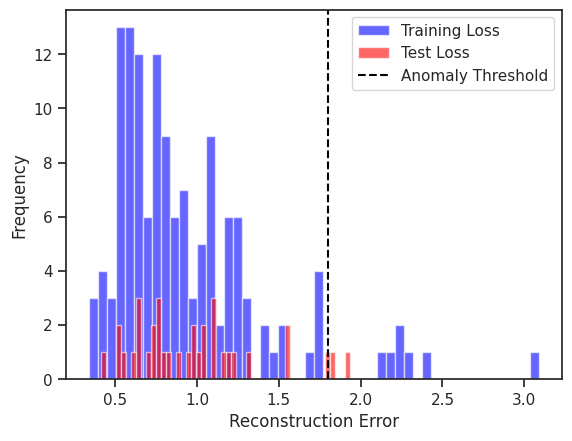

Threshold for anomaly detection: 1.7993983507156353
Number of anomalies in test set: 2

Anomalous samples indices in the test set:
[ 7 31]


In [62]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')  # Update this path

# Drop non-numeric columns (if any) and separate features
data = data.select_dtypes(include=[np.number])  # Keeps only numeric columns
X = data.drop(columns=['label'], errors='ignore')  # Drop 'label' if exists; otherwise ignore

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Define the autoencoder architecture in PyTorch
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 14),  # adjust layer sizes as needed
            nn.ReLU(),
            nn.Linear(14, 7),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, 14),
            nn.ReLU(),
            nn.Linear(14, input_dim),
            nn.Sigmoid()  # or use nn.Identity() if input data isn't normalized to [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the autoencoder
num_epochs = 50
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    for i in range(0, X_train_tensor.size(0), batch_size):
        batch = X_train_tensor[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Set a threshold for anomaly detection based on reconstruction error
model.eval()
with torch.no_grad():
    # Get reconstruction error for training data
    train_reconstructions = model(X_train_tensor)
    train_loss = torch.mean((train_reconstructions - X_train_tensor) ** 2, dim=1).numpy()
    threshold = np.percentile(train_loss, 95)  # 95th percentile

    # Calculate reconstruction error for test data
    test_reconstructions = model(X_test_tensor)
    test_loss = torch.mean((test_reconstructions - X_test_tensor) ** 2, dim=1).numpy()
    anomalies = test_loss > threshold

# Plot training and test reconstruction errors
plt.hist(train_loss, bins=50, alpha=0.6, color='blue', label='Training Loss')
plt.hist(test_loss, bins=50, alpha=0.6, color='red', label='Test Loss')
plt.axvline(threshold, color='black', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display results
print(f"Threshold for anomaly detection: {threshold}")
print(f"Number of anomalies in test set: {np.sum(anomalies)}")
print("\nAnomalous samples indices in the test set:")
print(np.where(anomalies)[0])  # Indices of anomalies in the test set


Class Distribution:
 total_time25
59175     12
83445      3
69575      1
63630      1
47190      1
          ..
154130     1
159815     1
106760     1
53725      1
273675     1
Name: count, Length: 161, dtype: int64

Accuracy: 0.018867924528301886

Classification Report:
               precision    recall  f1-score   support

       29980       0.00      0.00      0.00         1
       35530       0.00      0.00      0.00         1
       36845       0.00      0.00      0.00         0
       37840       0.00      0.00      0.00         1
       39380       0.00      0.00      0.00         1
       43805       0.00      0.00      0.00         1
       44705       0.00      0.00      0.00         1
       46310       0.00      0.00      0.00         1
       47190       0.00      0.00      0.00         1
       47440       0.00      0.00      0.00         1
       50155       0.00      0.00      0.00         1
       50730       0.00      0.00      0.00         1
       51210       0.00 

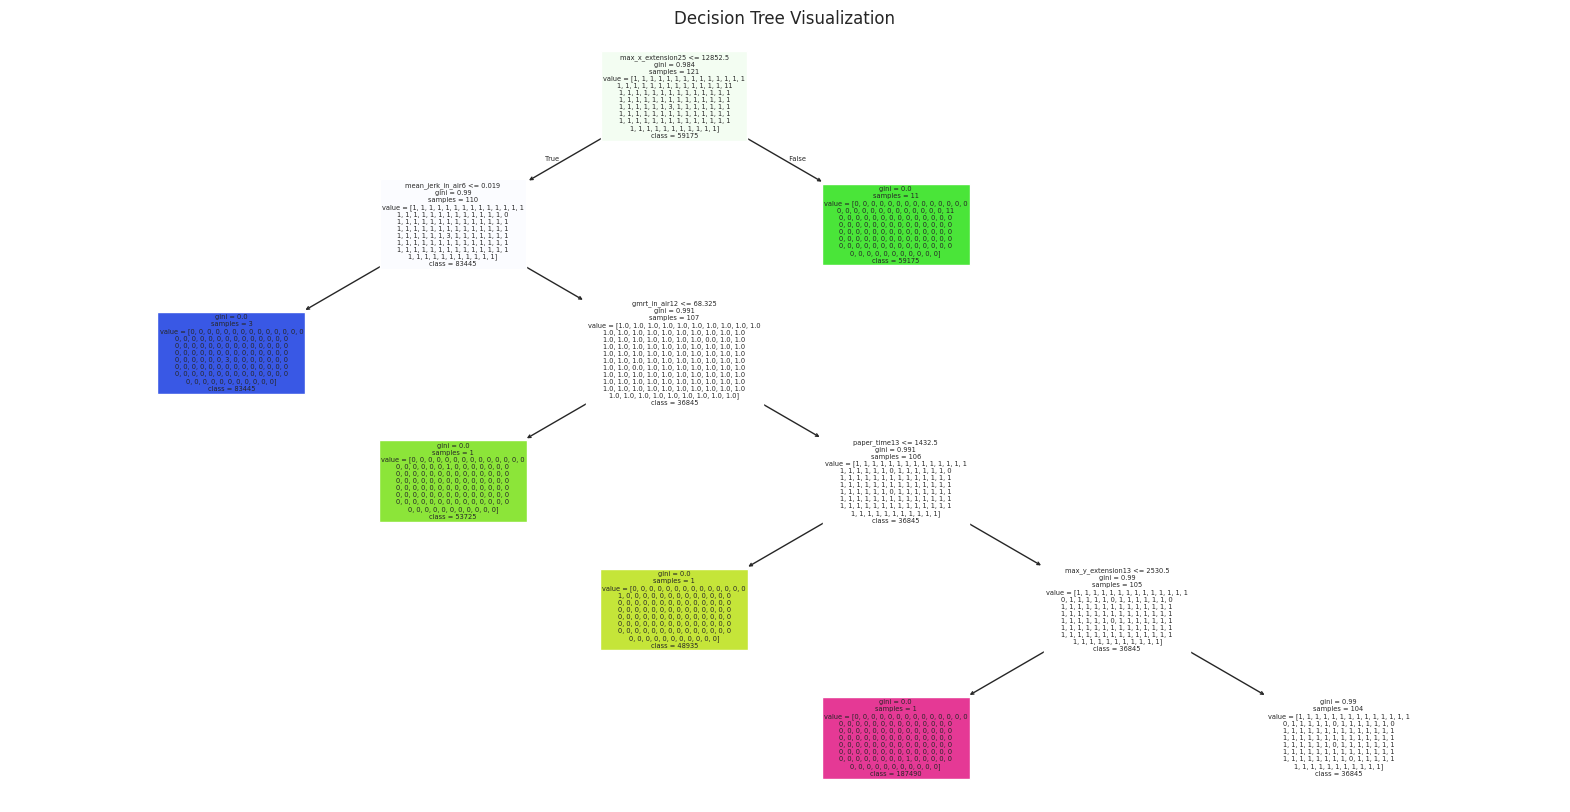


Decision Tree Rules:
 |--- max_x_extension25 <= 12852.50
|   |--- mean_jerk_in_air6 <= 0.02
|   |   |--- class: 83445
|   |--- mean_jerk_in_air6 >  0.02
|   |   |--- gmrt_in_air12 <= 68.33
|   |   |   |--- class: 53725
|   |   |--- gmrt_in_air12 >  68.33
|   |   |   |--- paper_time13 <= 1432.50
|   |   |   |   |--- class: 48935
|   |   |   |--- paper_time13 >  1432.50
|   |   |   |   |--- max_y_extension13 <= 2530.50
|   |   |   |   |   |--- class: 187490
|   |   |   |   |--- max_y_extension13 >  2530.50
|   |   |   |   |   |--- class: 36845
|--- max_x_extension25 >  12852.50
|   |--- class: 59175



In [63]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Preprocessing: Check and clean column names
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces from column names

# Automatically identify the target column
target_column = 'class' if 'class' in data.columns else data.columns[-1]  # Assuming the last column is the target
X = data.drop(columns=['ID', target_column], errors='ignore')  # Features
y = data[target_column]  # Target variable

# Check class distribution
print("Class Distribution:\n", y.value_counts())

# Handle underrepresented classes
min_class_count = y.value_counts().min()
if min_class_count < 2:
    print("\nWarning: Some classes have less than 2 samples. Proceeding without stratification.")
    stratify_option = None
else:
    stratify_option = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=stratify_option)

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)  # Handle undefined metrics

# Print evaluation results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree,
    feature_names=X.columns,
    class_names=[str(cls) for cls in decision_tree.classes_],  # Convert class names to strings
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()

# Export textual rules of the decision tree
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)


K-means Cluster Assignments:
   Cluster  Count
0        1    122
1        2     36
2        0     16


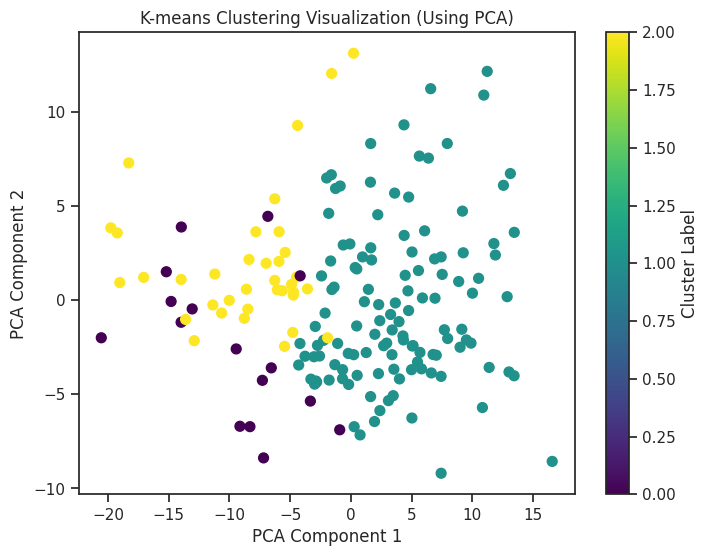

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Preprocess the data: Select numeric columns and scale them
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters as needed
kmeans.fit(scaled_data)

# Add cluster labels to the dataset
data['kmeans_cluster'] = kmeans.labels_

# Display cluster assignments
print("K-means Cluster Assignments:")
cluster_summary = data[['kmeans_cluster']].value_counts().reset_index()
cluster_summary.columns = ['Cluster', 'Count']
print(cluster_summary)

# Visualize the clusters using the first two PCA components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title("K-means Clustering Visualization (Using PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()



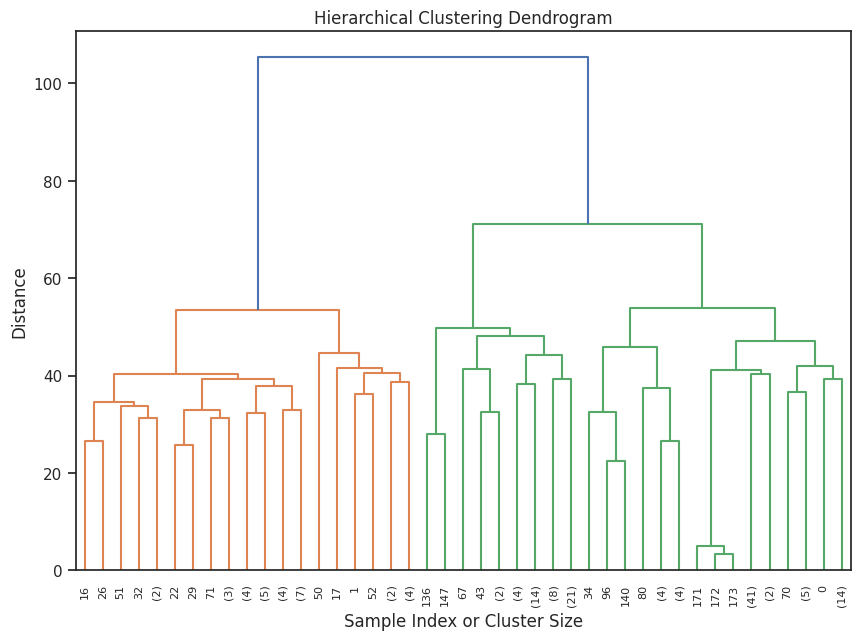

In [65]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute the linkage matrix
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)  # Truncate to show top 5 levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()


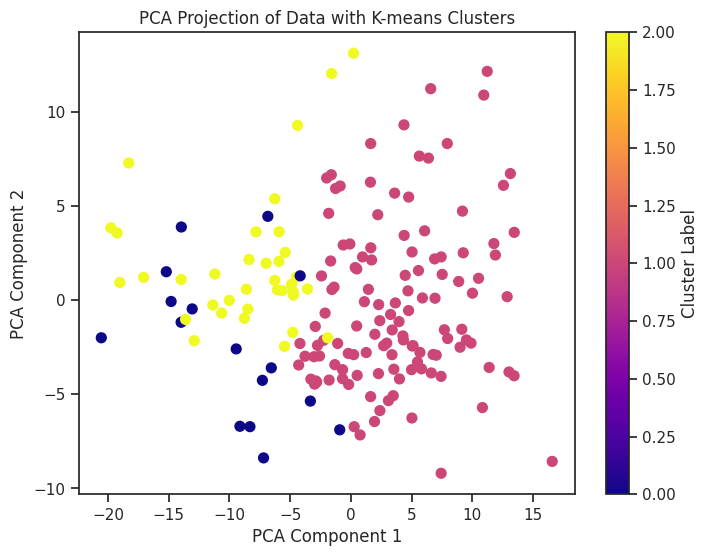

Explained Variance by PCA Components:
Component 1: 12.76%, Component 2: 4.06%


In [66]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_data = pca.fit_transform(scaled_data)

# Add PCA components to the dataset
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# Visualize the data in the reduced PCA space
plt.figure(figsize=(8, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=kmeans.labels_, cmap='plasma', s=50)
plt.title("PCA Projection of Data with K-means Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

# Display PCA results
print("Explained Variance by PCA Components:")
explained_variance = pca.explained_variance_ratio_
print(f"Component 1: {explained_variance[0]:.2%}, Component 2: {explained_variance[1]:.2%}")